# Latihan


Pada latihan ini kalian akan hands-on bersama instruktur atau mentor kalian untuk membuat pemodelan prediktif untuk kasus regresi dan klasifikasi. Jadi, instruktur dan student akan mencoba melengkapi proses pembuatan machine learning dari setiap kasus berikut.
- **Kasus Regresi**: Prediksi gaji atau salary karyawan Menggunakan Linear Regression dan Decision Tree Regressor. Gunakan [Salary Dataset - Kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) , pada dataset tersebut hanya terdapat 3 kolom.
- **Kasus Klasifikasi**: Loan Status Prediction. Gunakan [Loan Dataset - Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

# Kasus - 1 : Prediksi Salary Karyawan.

Pada kasus ini kalian akan mencoba melakukan prediksi sederhana menggunakan Linear Regression dan Decision Tree. Metrik Evaluasi model yang digunakan adalah MAE dan MSE. Berdasarkan Metrik tersebut berikan kesimpulan model mana yang terbaik.

> **Catatan**: Untuk menghemat waktu, lengkapi hanya pada bagian pemodelan Machine Learningnya saja.

## Import Libraries

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Loading

In [ ]:
# Lakukan Data Loading
!mkdir ~/.kaggle

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle

In [ ]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.34MB/s]


In [ ]:
!unzip /content/salary-dataset-simple-linear-regression.zip

Archive:  /content/salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [ ]:
df= pd.read_csv('/content/Salary_dataset.csv')
df.shape

(30, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df= df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## EDA (Exploratory Data Analysis)

Untuk menghemat waktu, pada bagian kita hanya melakukan explorasi sederhana untuk cek ditribusi data dan korelasi antara Salary dan YearsExperience.

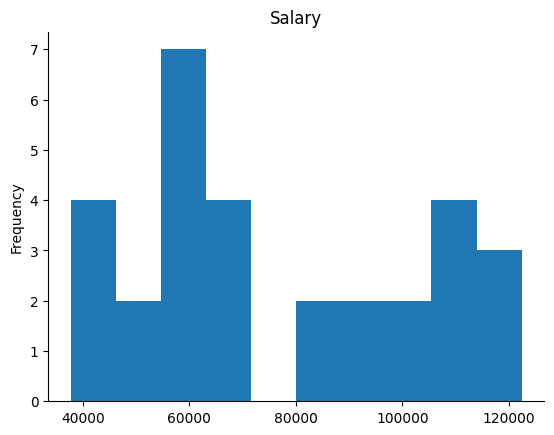

In [ ]:
df['Salary'].plot(kind='hist', bins=10, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

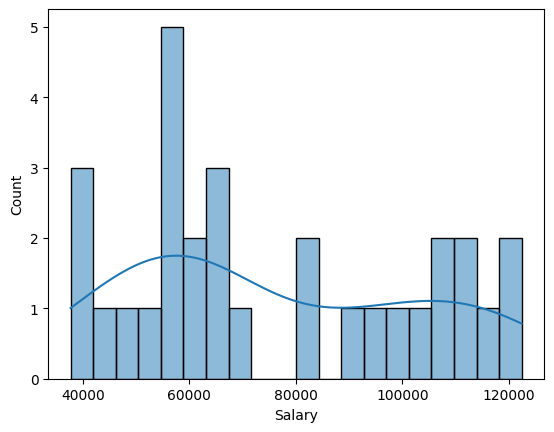

In [ ]:
sns.histplot(df, x='Salary', bins=20, kde=True); #Menggunakan seaborn

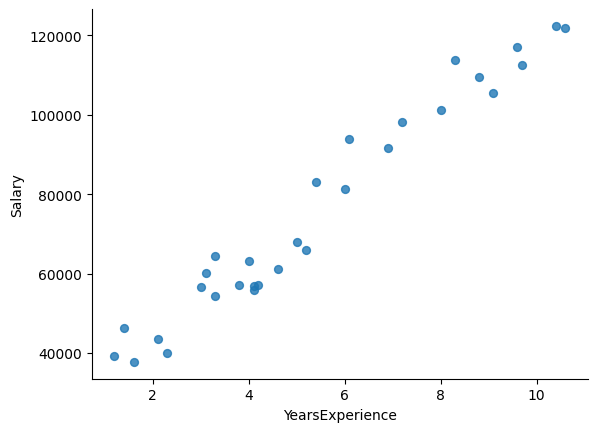

In [ ]:
# Cek kolerasi atau lakukan visualisasi dengan scatterplot
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

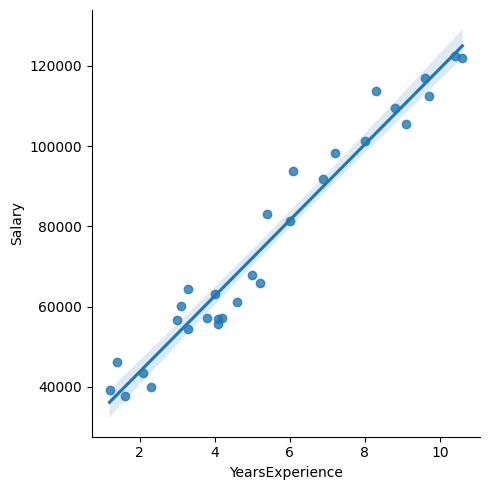

In [ ]:
sns.lmplot(df, x='YearsExperience', y='Salary');

## Data Preprocessing

In [ ]:
# lakukan splitting data
X= df['YearsExperience'] #fitur
y=df['Salary'] #target

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(24,)

Karena kita hanya memiliki satu fitur dalam bentuk Series (1 dimensi), sedangkan untuk melakukan scaling dengan StandardScaler kita membutuhkan fitur 2 dimensi, maka kita butuh melakukan reshape agar menjadi 2 dimensi.

In [ ]:
# Mengonversi Series menjadi array numpy
X_train = X_train.values
X_test = X_test.values

# Reshape array
X_train_reshape = X_train.reshape(-1, 1)
X_test_reshape = X_test.reshape(-1, 1)

In [ ]:
X_train_reshape.shape

(24, 1)

In [ ]:
# lakukan scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_reshape)
X_test_scaled= sc.transform(X_test_reshape)

## Pemodelan Machine Learning


Bandingkan Hasil pemodelan Linear Regression dan Decision Tree Regressor menggunakan MAE dan MSE, model mana yang tebaik dan jelaskan apakah Model kalian Overfitting atau Underfitting?

### LinReg

In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
print('Intercept:',lin_reg.intercept_)
print('Slope (Coefficient):',lin_reg.coef_[0])

Intercept: 73887.20833333334
Slope (Coefficient): 24053.85556856606


In [ ]:
y_pred_train= lin_reg.predict(X_train_scaled)
y_pred_test= lin_reg.predict(X_test_scaled)
y_pred_test

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [ ]:
print('MAE train:', mean_absolute_error(y_train, y_pred_train))
print('MAE test:', mean_absolute_error(y_test, y_pred_test))

MAE train: 5221.078554315732
MAE test: 2446.1723690465005


In [ ]:
print('R2 Score train:', r2_score(y_train, y_pred_train))
print('R2 Score test:', r2_score(y_test, y_pred_test))

R2 Score train: 0.9411949620562127
R2 Score test: 0.988169515729126


### Decision Tree

In [ ]:
model_dt= DecisionTreeRegressor(max_depth=3, random_state=42)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
y_pred_train= model_dt.predict(X_train_scaled)
y_pred_test= model_dt.predict(X_test_scaled)
y_pred_test

array([ 43208.        , 121873.        ,  58342.625     ,  58342.625     ,
       110677.33333333, 110677.33333333])

In [ ]:
print('MAE train:', mean_absolute_error(y_train, y_pred_train))
print('MAE test:', mean_absolute_error(y_test, y_pred_test))

print('R2 Score train:', r2_score(y_train, y_pred_train))
print('R2 Score test:', r2_score(y_test, y_pred_test))

MAE train: 2321.413194444445
MAE test: 3278.3333333333335
R2 Score train: 0.9868298284006529
R2 Score test: 0.9851200894718765


In [ ]:
print('MSE test:', mean_squared_error(y_test, y_pred_test))

MSE test: 16128775.736689823


# Kasus - 2 : Loan Status Prediction

Pada kasus ini kalian akan mencoba melakukan prediksi Loan Status menggunakan Logistic Regression dan Decision Tree. Metrik Evaluasi model yang akan kalian coba adalah Accuracy, Recall, Precission dan pengecekan dengan classsification report. Berdasarkan Metrik tersebut berikan kesimpulan model mana yang terbaik.

> **Catatan**: Untuk menghemat waktu, anda dapat melakukan EDA seperti pada materi sebelumnya: [EDA - Statistika Deskriptif](https://colab.research.google.com/drive/1xJ4BNWPB_q3nyDTu-k2dXU9sIdUzm6bJ?usp=sharing)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

## Data Loading

In [ ]:
!kaggle datasets download -d bhavikjikadara/loan-status-prediction

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 12.8MB/s]


In [ ]:
!unzip -q /content/loan-status-prediction.zip

In [ ]:
df= pd.read_csv('/content/loan_data.csv')

In [ ]:
#pengecekan tipe data dan data yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
#Pengecekan Data yang hilang
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#drop baris yang memiliki missing values pada Self_Employed dan Credit_History
df= df.dropna(subset=['Self_Employed','Credit_History','Gender'])

In [ ]:
#isi data yang hilang dengan modus
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     10
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## EDA

Lakukan EDA basic atau gunakan seperti materi ini: [EDA - Statistika Deskriptif](https://colab.research.google.com/drive/1xJ4BNWPB_q3nyDTu-k2dXU9sIdUzm6bJ?usp=sharing)

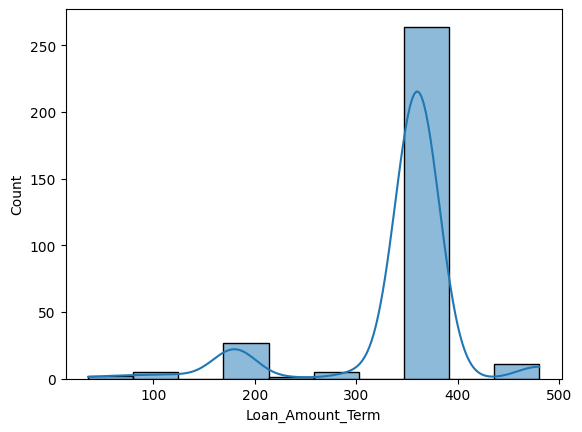

In [ ]:
# lakukan EDA basic atau gunakan seperti materi
sns.histplot(df,x='Loan_Amount_Term', kde=True);

In [ ]:
#isi data yang hilang dengan modus
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,3614.295385,1260.793600,104.649231,341.981538,0.836923
std,1461.056832,2472.807284,29.008620,67.591088,0.370006
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2600.000000,0.000000,89.000000,360.000000,1.000000
50%,3333.000000,800.000000,110.000000,360.000000,1.000000
75%,4333.000000,1929.000000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


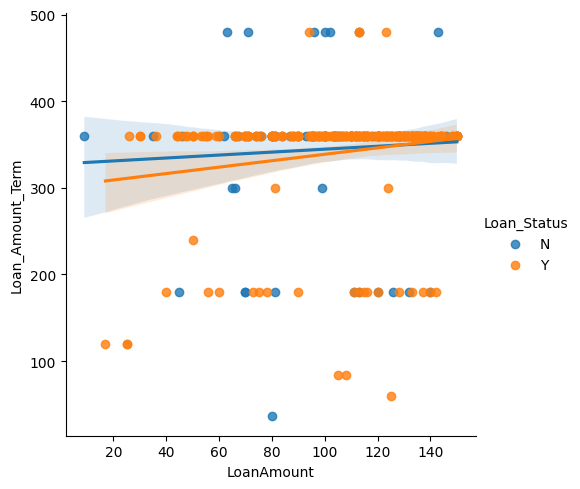

In [ ]:
sns.lmplot(df, x='LoanAmount', y='Loan_Amount_Term',hue='Loan_Status');

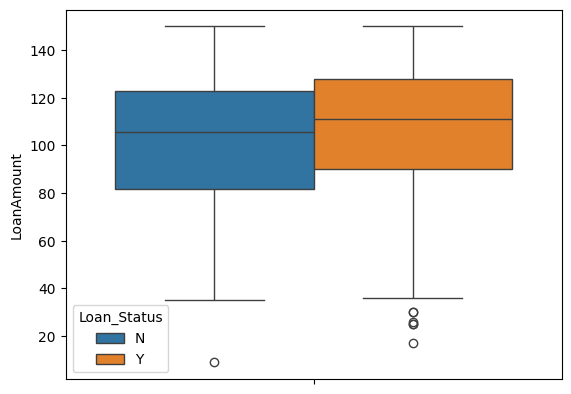

In [ ]:
sns.boxplot(df, orient='v', y='LoanAmount', hue='Loan_Status');

In [ ]:
df['Loan_Amount_Term'].describe()

count    325.000000
mean     341.981538
std       67.591088
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

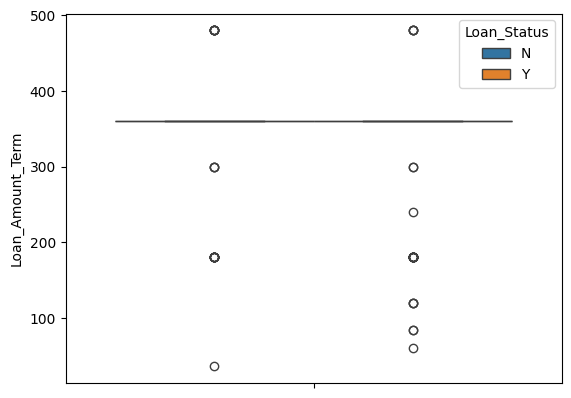

In [ ]:
sns.boxplot(df, orient='v', y='Loan_Amount_Term', hue='Loan_Status');

In [ ]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## Data Preprocessing

- Lakukan Encodingan pada data bertipe `Object` atau `string`
- Lakukan juga scaling untuk data numerikal

In [ ]:
categorical_cols= df.select_dtypes('object').columns.tolist()
numeric_cols= df.select_dtypes('number').columns.tolist()
print(categorical_cols)
print(numeric_cols)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
categorical_cols.remove('Loan_Status')

In [ ]:
categorical_cols.remove('Loan_ID')

In [ ]:
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [ ]:
numeric_cols= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
categorical_cols_enc= ['Credit_History']

In [ ]:
X= df.drop(['Loan_Status','Loan_ID'], axis=1)
y= df['Loan_Status']

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
36,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban
308,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural
97,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban
95,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban
297,Male,No,0,Graduate,No,6000,0.0,140.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
12,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural
98,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban
144,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban
328,Female,No,0,Not Graduate,No,3400,0.0,95.0,360.0,1.0,Rural


In [ ]:
numeric_transformer= Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
     ('scaler', MinMaxScaler()),

])

categorical_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder()),
])

preprocessor= ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('enc_nominal', categorical_transformer, categorical_cols),
        ('enc_cat_nominal', SimpleImputer(strategy='most_frequent'), categorical_cols_enc),
    ],
    remainder='passthrough',
    verbose=True
)

In [ ]:
X_train_new= preprocessor.fit_transform(X_train)
X_test_new= preprocessor.transform(X_test)

[ColumnTransformer] ........... (1 of 3) Processing num, total=   0.0s
[ColumnTransformer] ... (2 of 3) Processing enc_nominal, total=   0.0s
[ColumnTransformer]  (3 of 3) Processing enc_cat_nominal, total=   0.0s


In [ ]:
preprocessor?

In [ ]:
preprocessor.named_transformers_['enc_nominal'].get_feature_names_out(categorical_cols)

array(['Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [ ]:
cols_trans= preprocessor.named_transformers_['enc_nominal'].get_feature_names_out(categorical_cols)

cols_final= (numeric_cols + list(cols_trans) + categorical_cols_enc)

X_train_final= pd.DataFrame(X_train_new, columns=cols_final)
X_test_final= pd.DataFrame(X_test_new, columns=cols_final)

In [ ]:
X_train_final.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History
0,0.403015,0.067234,0.957447,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.355595,0.000000,0.503546,0.72973,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.179315,0.030765,0.631206,0.72973,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.324924,0.000000,0.290780,0.72973,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.612373,0.000000,0.929078,0.72973,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_train= y_train.map({'Y':1, 'N':0})
y_test= y_test.map({'Y':1, 'N':0})

In [ ]:
data_train= pd.concat([X_train_final,y_train],axis=1)
data_train.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Credit_History,Loan_Status
0,0.403015,0.067234,0.957447,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
1,0.355595,0.000000,0.503546,0.72973,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
data_train[numeric_cols].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.273265,0.250474,-0.114330
CoapplicantIncome,-0.273265,1.000000,0.090357,-0.026425
LoanAmount,0.250474,0.090357,1.000000,0.113325
Loan_Amount_Term,-0.114330,-0.026425,0.113325,1.000000


In [ ]:
data_train[numeric_cols + ['Loan_Status']].corr(method='kendall')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
ApplicantIncome,1.000000,-0.339761,0.198705,-0.078078,-0.008997
CoapplicantIncome,-0.339761,1.000000,0.185685,-0.038012,0.093572
LoanAmount,0.198705,0.185685,1.000000,0.057490,0.046198
Loan_Amount_Term,-0.078078,-0.038012,0.057490,1.000000,-0.035456
Loan_Status,-0.008997,0.093572,0.046198,-0.035456,1.000000


## Pemodelan Machine Learning

Bandingkan Hasil pemodelan Logistic Regression dan Decision Tree. Model mana yang tebaik dan jelaskan apakah Model kalian Overfitting atau Underfitting?

### Decision Tree

In [ ]:
model_dt= DecisionTreeClassifier(random_state=3, max_depth=4)
model_dt.fit(X_train_final, y_train)

DecisionTreeClassifier(max_depth=4, random_state=3)

In [ ]:
y_pred_train= model_dt.predict(X_train_final)
y_pred_test= model_dt.predict(X_test_final)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
# Classification Report
print("Classification Repor data train:")
print(classification_report(y_train, y_pred_train))

Classification Repor data train:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        80
           1       0.82      1.00      0.90       180

    accuracy                           0.85       260
   macro avg       0.91      0.75      0.78       260
weighted avg       0.87      0.85      0.83       260



In [ ]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, y_pred_test))

Classification Repor data test:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.86      0.91      0.89        47

    accuracy                           0.83        65
   macro avg       0.80      0.76      0.78        65
weighted avg       0.82      0.83      0.83        65



### Logistic Regression

In [ ]:
model_logreg= LogisticRegression(random_state=42)
model_logreg.fit(X_train_final, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_train= model_logreg.predict(X_train_final)
y_pred_test= model_logreg.predict(X_test_final)
y_pred_test

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, y_pred_test))

Classification Repor data test:
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.90      0.96      0.93        47

    accuracy                           0.89        65
   macro avg       0.88      0.84      0.86        65
weighted avg       0.89      0.89      0.89        65



### Hyperparameter Tuning

**GridSearchCV - Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    'max_depth': [3,4,5,6,7,8,9],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2,3,4]
}

grid_search_params

{'max_depth': [3, 4, 5, 6, 7, 8, 9],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [2, 3, 4]}

In [ ]:
# Train dengan Grid Search
%%time

dt_gridcv = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='accuracy')

dt_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
CPU times: user 236 ms, sys: 9.29 ms, total: 246 ms
Wall time: 2.32 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=2)

In [ ]:
dt_gridcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
pd.DataFrame(dt_gridcv.cv_results_).query('rank_test_score==1')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.010390,0.001954,0.008991,0.003608,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.826923,0.769231,0.846154,0.769231,0.846154,0.811538,0.035251,1
10,0.006130,0.001775,0.003013,0.000457,4,2,3,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.826923,0.769231,0.846154,0.769231,0.846154,0.811538,0.035251,1
11,0.004645,0.001485,0.003532,0.001230,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.826923,0.769231,0.846154,0.769231,0.846154,0.811538,0.035251,1
12,0.008744,0.002933,0.008064,0.006373,4,3,2,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.826923,0.750000,0.846154,0.769231,0.865385,0.811538,0.044522,1
13,0.006924,0.002516,0.007868,0.002960,4,3,3,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.826923,0.750000,0.846154,0.769231,0.865385,0.811538,0.044522,1
14,0.010471,0.002742,0.006812,0.003836,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.826923,0.750000,0.846154,0.769231,0.865385,0.811538,0.044522,1


F1 Score - Test Set   :  0.9166666666666666 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.90      0.94      0.92        47

    accuracy                           0.88        65
   macro avg       0.86      0.83      0.84        65
weighted avg       0.87      0.88      0.87        65
 

Confusion Matrix      : 


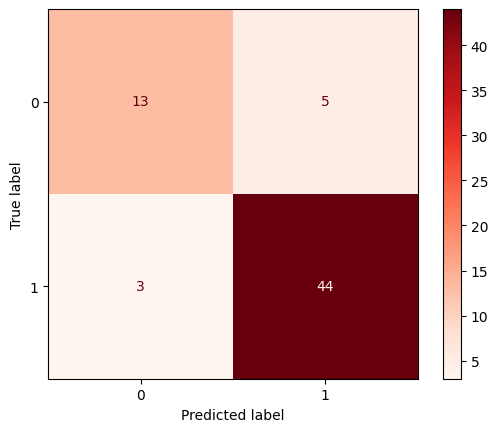

In [ ]:
# Check Performance Model pada Test-Set

y_pred_test = dt_gridcv.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_gridcv, X_test_final, y_test, cmap='Reds'))

**GridSearchCV - Logistic Regression**

In [ ]:
grid_search_params_logreg = {
    'penalty': ['l1','l2'],
    'solver': ['liblinear'],
    'C': [1, 0.9, 0.01, 1.5, 2]
}

grid_search_params_logreg

{'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': [1, 0.9, 0.01, 1.5, 2]}

In [ ]:
# Train dengan Grid Search
%%time

logreg_gridcv = GridSearchCV(estimator=LogisticRegression(random_state=42),
                         param_grid=grid_search_params_logreg,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='accuracy')

logreg_gridcv.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
CPU times: user 71 ms, sys: 7.33 ms, total: 78.3 ms
Wall time: 375 ms


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 0.9, 0.01, 1.5, 2], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [ ]:
logreg_gridcv.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

F1 Score - Test Set   :  0.9278350515463918 

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79        18
           1       0.90      0.96      0.93        47

    accuracy                           0.89        65
   macro avg       0.88      0.84      0.86        65
weighted avg       0.89      0.89      0.89        65
 

Confusion Matrix      : 


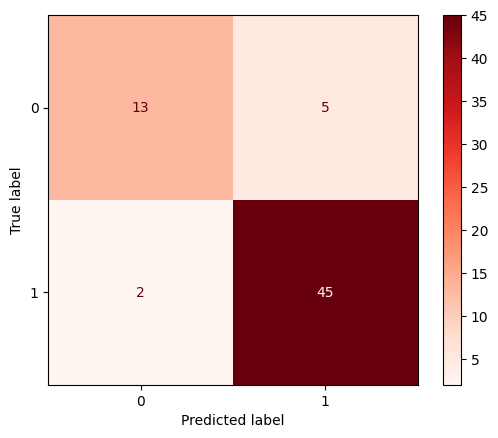

In [ ]:
# Check Performance Model pada Test-Set

y_pred_test = logreg_gridcv.predict(X_test_final)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_gridcv, X_test_final, y_test, cmap='Reds'))

In [ ]:
eval_df= {
    'actual': y_test,
    'predicted': y_pred_test
}

eval_df= pd.DataFrame(eval_df)
eval_df.head()

,actual,predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,0,1
